In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [2]:
### Load the training array, labels and features
train_array = np.load('train_array.npy')
train_labels = np.load('train_labels.npy')
train_features = np.load('train_features.npy')

In [3]:
### Load the validation array, labels and features
valid_array = np.load('valid_array.npy')
valid_labels = np.load('valid_labels.npy')
valid_features = np.load('valid_features.npy')

In [4]:
### Load the test array, labels and features
test_array = np.load('test_array.npy')
test_labels = np.load('test_labels.npy')
test_features = np.load('test_features.npy')

In [5]:
### Create inputs and outputs for training ang validation
X_train = train_features
X_valid = valid_features
X_test = test_features
y_train = train_labels
y_valid = valid_labels
y_test = test_labels

# SVM Classifier
Try with an SVM classifier. Does the RBF kernel perform better than the linear one? You don’t need to tune the hyperparameters.

## Linear SVC

In [6]:
lsvc_model = LinearSVC(random_state=0, dual='auto')
lsvc_model.fit(X_train, y_train)
accuracy = lsvc_model.score(X_valid, y_valid)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.91


In [7]:
print('Test accuracy: {:.2f}'.format(lsvc_model.score(X_test, y_test)))

Test accuracy: 0.92


## RBF

In [8]:
rbf_model = SVC(kernel='rbf', gamma='auto', random_state=0)
rbf_model.fit(X_train, y_train)
accuracy = rbf_model.score(X_valid, y_valid)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.92


In [9]:
print('Test accuracy: {:.2f}'.format(rbf_model.score(X_test, y_test)))

Test accuracy: 0.96


The **RBF** performs better then the **Linear** and the test accuracy increases

Pick ten images and compute the probability for each category using the `predict_proba()` function of the best SVM estimator you found in the previous question. Plot the results for each image and comment your findings. For example, you can plot the ten images in subplots and collect the probabilities in a DataFrame.

Finally, vary the regularization strength of your SVM estimator (e.g. once using a C value of 0.0001 and once of 1000). What is the effect on the probabilities? Write your observations in a markdown cell.

### Tuning hyperparameters

In [10]:
C_reg = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]
acc = []
for cr in C_reg:
    tune_rbf_model = SVC(C=cr, kernel='rbf', gamma='auto', random_state=0)
    tune_rbf_model.fit(X_train, y_train)
    acc.append(tune_rbf_model.score(X_valid, y_valid))

Text(0, 0.5, 'Accuracy')

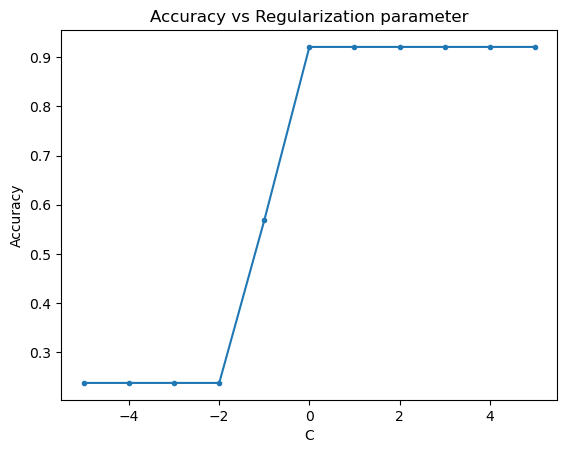

In [11]:
plt.title('Accuracy vs Regularization parameter')
plt.plot(np.log10(C_reg), acc, '.-')
# plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')

From **C=1** (same as default) the accuracy reaches its maximum and is kept constant by increasing the regularization term. 

In [12]:
best_rbf_model = SVC(C=1, kernel='rbf', gamma='auto', random_state=0)
best_rbf_model.fit(X_train, y_train)
accuracy = best_rbf_model.score(X_valid, y_valid)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.92


In [13]:
print('Test accuracy: {:.2f}'.format(best_rbf_model.score(X_test, y_test)))

Test accuracy: 0.96
